### Imports, parameters

In [1]:
import os
from gtts import gTTS
import matplotlib.pyplot as plt
import pydub
from pydub import AudioSegment
from PIL import Image  

In [2]:
# input
lang = 'en' # 'en', 'fr', ...
address1 = "Jearom Chaoss"
address2 = "Chemin of Thedsq 55"
address3 = "86322 Jeslamos"
dear = "Salut mon cher,"
text = " Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nullam consectetur vel velit eget ultricies. In et lacinia nisi, ac cursus ipsum. Pellentesque efficitur at tellus feugiat consequat. Phasellus orci sem, pharetra non malesuada sed, aliquet vitae arcu. Sed aliquet, mi at porta maximus, mauris lectus interdum eros, a placerat enim velit in velit. Quisque quis nisi eleifend, mattis nibh sodales, pulvinar ante. Nam iaculis, justo vel pellentesque blandit, ipsum ligula accumsan lectus, vel auctor neque urna ut mauris. Etiam vel ipsum quam. Praesent finibus pellentesque scelerisque. Suspendisse scelerisque tristique ultrices. Proin augue nisl, malesuada sed hendrerit in, malesuada sed quam. Integer metus enim, tempor vitae dictum in, euismod vel eros. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean eget tempus lectus, at commodo enim. Vivamus in augue orci. Mauris facilisis nibh ante, ac varius justo rutrum eu. Duis in augue dictum, bibendum felis ac, tristique orci. Nulla orci nisl, porta sit amet quam sed, aliquam pellentesque massa. Duis rhoncus dolor eu elit placerat volutpat. Morbi aliquet volutpat egestas. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Sed nec dolor nec nibh ultricies posuere venenatis ac lectus. Ut accumsan commodo nisi. "
conclusion = "Please die in a fire"
signature = "Me, myself and I"

# paths
sound_name = 'hello.mp3'
temp_name = 'temp.png'
output_name = 'file.pdf'

# consts
DPI=300
PAGE_SIZE=(2480, 3508)  # A4 at 300dpi
PAGE_COLOR=(255, 255, 255)  # White
INK_COLOR=(0, 0, 0)  # Black
SAMPLE_CONST=200000
SAMPLE_SIZE=(7, 0.5)

ADDR_OFF=(1800, 200)
DEAR_OFF=(200, 750)
ROWS_OFF=(200, 1050)
# Specials
MARGIN=150

### Helpers

In [3]:
# From https://gist.github.com/kylemcdonald/bedcc053db0e7843ef95c531957cb90f
def full_frame(figsize=None):
    import matplotlib as mpl
    mpl.rcParams['savefig.pad_inches'] = 0
    fig = plt.figure(figsize=figsize)
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.autoscale(tight=True)
    return fig

In [4]:
def create_samples(text, lang='en'):
    tts = gTTS(text, lang=lang)
    tts.save(sound_name)
    sound = AudioSegment.from_mp3(sound_name)
    samples = sound.get_array_of_samples()
    return samples

In [5]:
def do_row(samples, off=(0, 0)):
    fig = full_frame((min(len(samples)/SAMPLE_CONST, 1) * SAMPLE_SIZE[0], SAMPLE_SIZE[1]))
    fig.set_dpi(DPI)
    plt.plot(samples, color=INK_COLOR)
    plt.axis('off')
    plt.savefig(temp_name, dpi=DPI, bbox_inches='tight')
    img = Image.open(temp_name)
    a4im.paste(img, off)

 ### Generating the file

In [6]:
a4im = Image.new('RGB',
                 PAGE_SIZE,   # A4 at 300dpi
                 PAGE_COLOR)  # White

#### Address

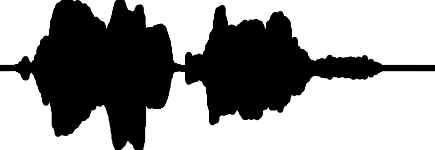

In [7]:
samples = create_samples(address1)[:SAMPLE_CONST//4]
offset = (ADDR_OFF[0], ADDR_OFF[1] + int(0 * DPI * SAMPLE_SIZE[1]))
do_row(samples, off=offset)

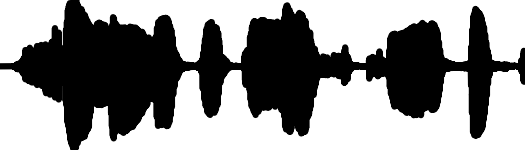

In [8]:
samples = create_samples(address2)[:SAMPLE_CONST//4]
offset = (ADDR_OFF[0], ADDR_OFF[1] + int(1 * DPI * SAMPLE_SIZE[1]))
do_row(samples, off=offset)

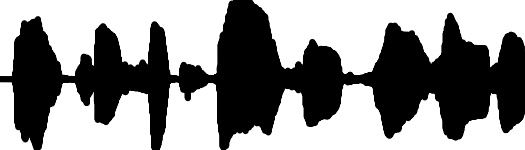

In [9]:
samples = create_samples(address3)[:SAMPLE_CONST//4]
offset = (ADDR_OFF[0], ADDR_OFF[1] + int(2 * DPI * SAMPLE_SIZE[1]))
do_row(samples, off=offset)

#### Dear

In [10]:
samples = create_samples(dear)[:SAMPLE_CONST]

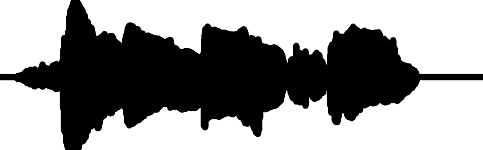

In [11]:
do_row(samples, off=DEAR_OFF)

#### Main text

In [12]:
samples = create_samples(text)

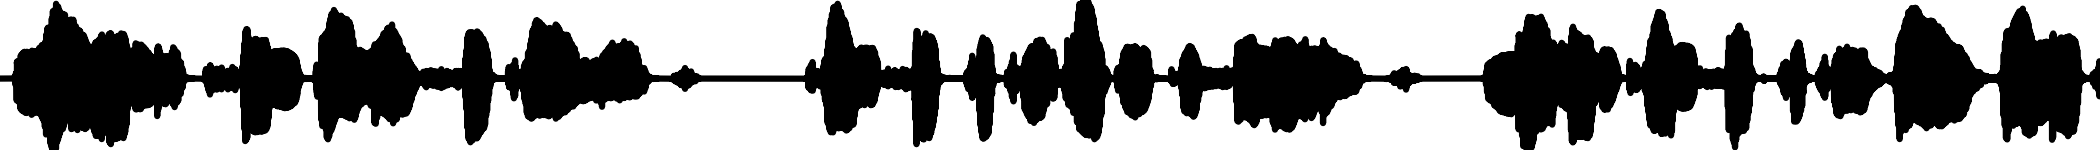

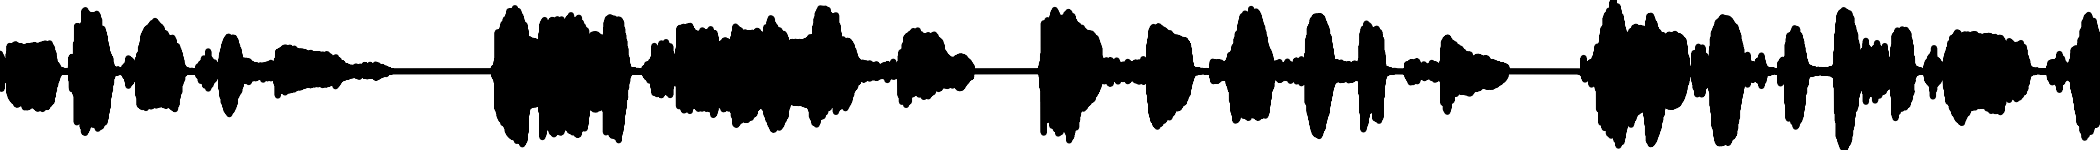

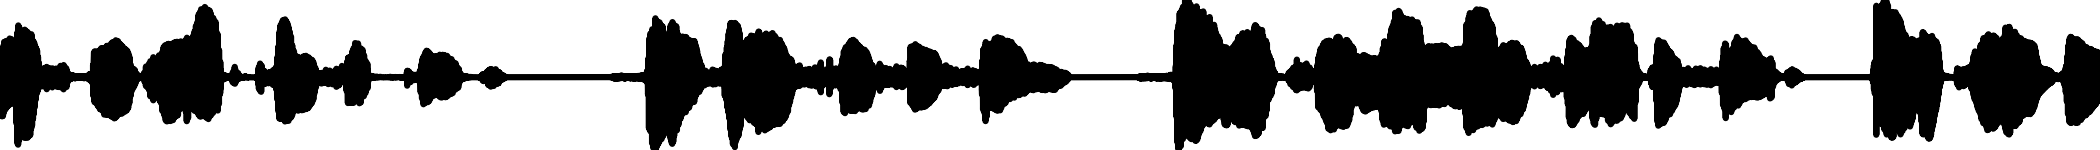

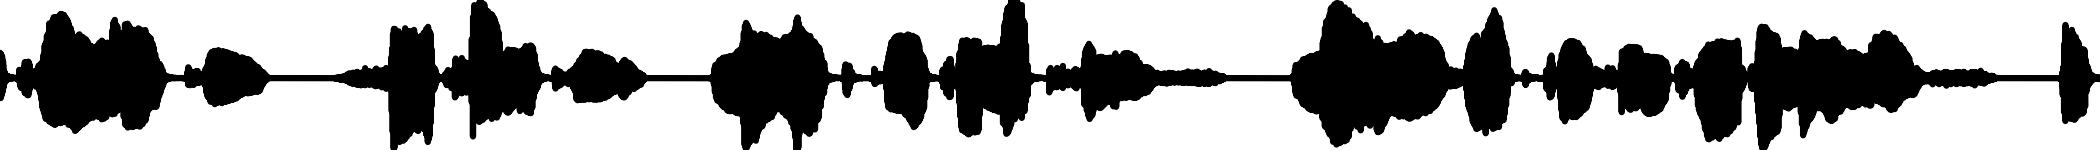

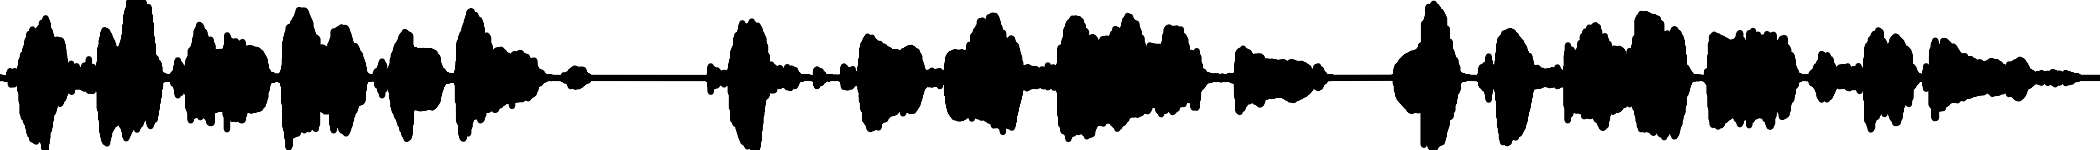

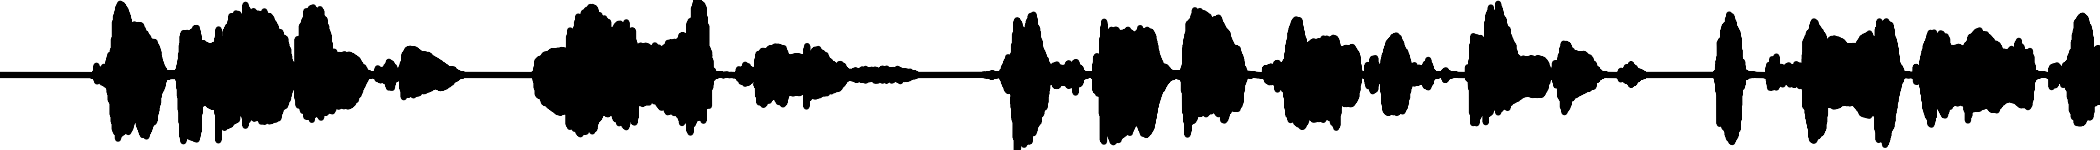

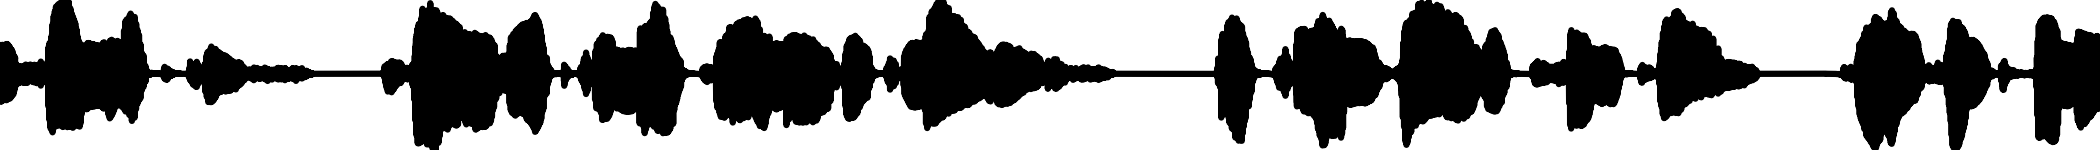

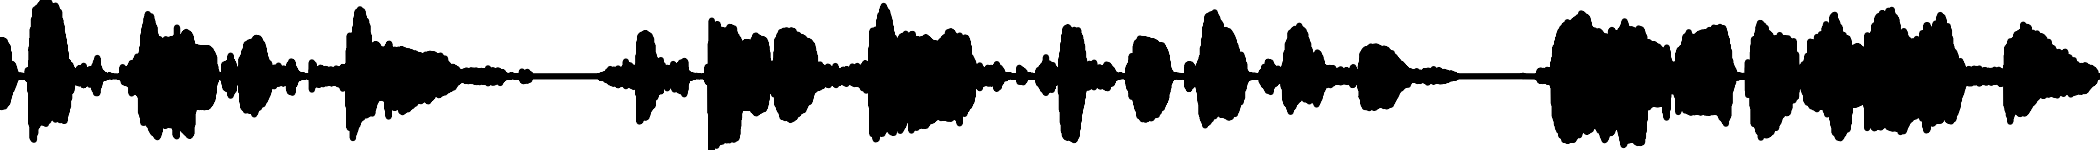

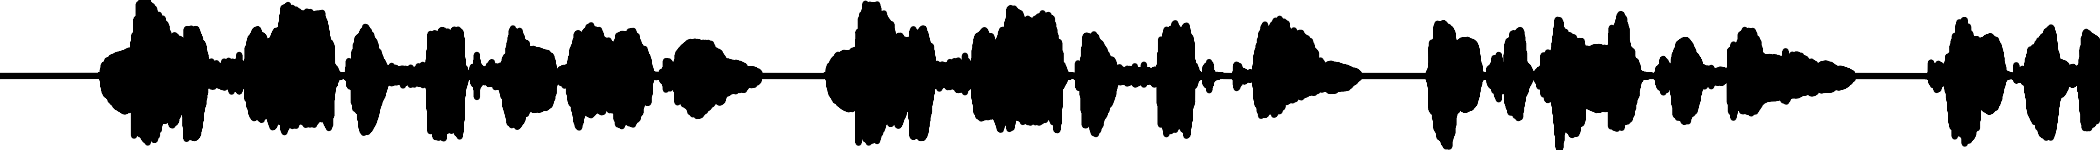

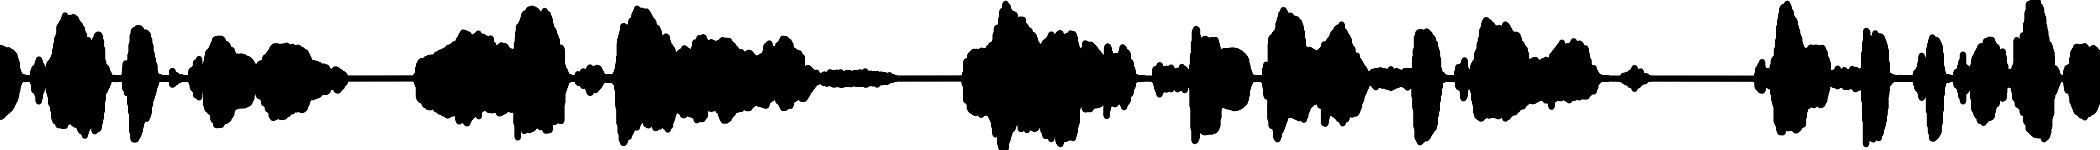

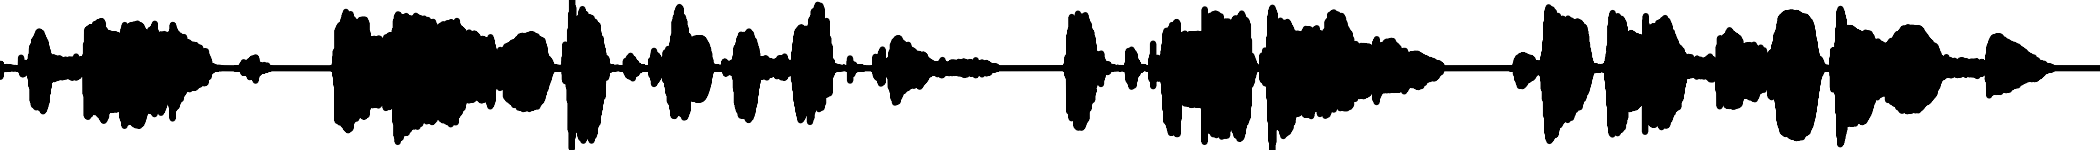

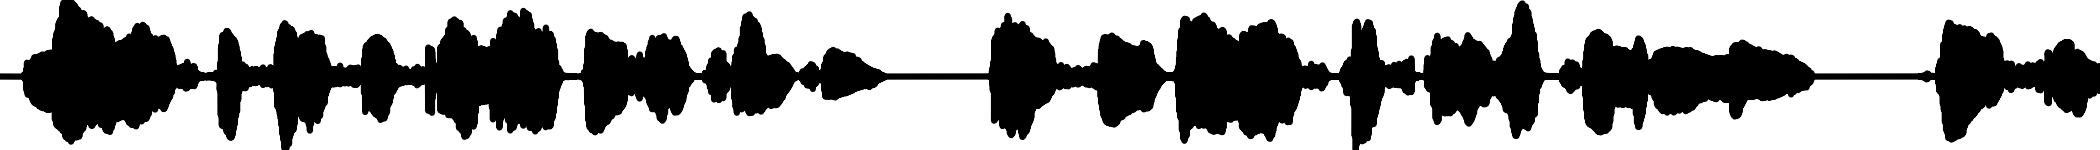

In [13]:
for i in range(0, min(12, 1 + len(samples) // SAMPLE_CONST)):
    sample = samples[i * SAMPLE_CONST:min(len(samples), (i + 1) * SAMPLE_CONST)]
    offset = (ROWS_OFF[0], ROWS_OFF[1] + int(i * DPI * SAMPLE_SIZE[1]))
    do_row(sample, off=offset)

#### Conclusion

In [14]:
i += 1

In [15]:
samples = create_samples(conclusion)[:SAMPLE_CONST]
offset = (ROWS_OFF[0], MARGIN + ROWS_OFF[1] + int(i * DPI * SAMPLE_SIZE[1]))

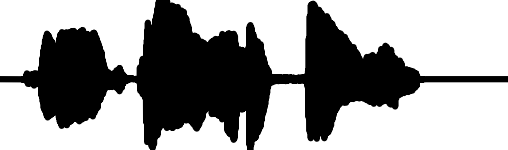

In [16]:
do_row(samples, off=offset)

#### Signature

In [17]:
i += 1

In [18]:
samples = create_samples(signature)[:SAMPLE_CONST]
offset = (ROWS_OFF[0], MARGIN + ROWS_OFF[1] + int(i * DPI * SAMPLE_SIZE[1]))

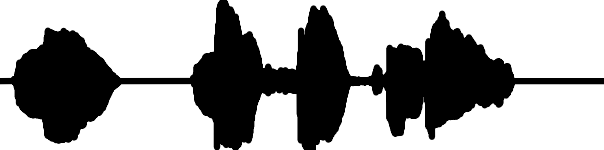

In [19]:
do_row(samples, off=offset)

### Finally...

In [20]:
a4im.save(output_name, 'PDF', quality=100)